In [276]:
%matplotlib inline

In [277]:
# 4g回归最优
# train_select_column = data.iloc[:,[2,3,13,14,15,16,17,18,23]]
# test_select_column = test_data.iloc[:,[2,3,13,14,15,16,17,18,23]]
# print train_select_column

In [278]:
# 4g分类最优
# train_select_column = data.iloc[:,[2,3,13,14,15,16,17,18,23,24,26]]
# test_select_column = test_data.iloc[:,[2,3,13,14,15,16,17,18,23,24,26]]
# print train_select_column

# 2G最优2,3,14,17,18,20,23,24,26

In [279]:
# data = pd.read_csv("LTE/new4gtrain.csv")
# test_data = pd.read_csv("LTE/new4gtest.csv")

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split  
from math import radians, cos, sin, asin, sqrt


def haversine(row): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(radians, [row[0], row[1], row[2], row[3]])  
 
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  

data = pd.read_csv("GSM/new2gtrain.csv")
test_data = pd.read_csv("GSM/new2gtest.csv")

In [281]:
# 2g分类最优
train_select_column = data.iloc[:,[2,3,14,17,18,20,23,24,26]]
test_select_column = test_data.iloc[:,[2,3,14,17,18,20,23,24,26]]
print train_select_column

       SRNCID  BestCellID  RSCP_1  RNCID_2  CellID_2  RSCP_2  RNCID_3  \
0        6290       49714     -62     6155     57939     -70     -999   
1        6290       49714     -62     6155     57939     -70     -999   
2        6290       49714     -61     6155     57939     -70     6301   
3        6290       49714     -61     6155     57939     -70     6301   
4        6290       49714     -61     6155     57939     -70     6301   
5        6290       49714     -61     6155     57939     -70     6301   
6        6290       49714     -61     6155     57939     -70     6301   
7        6290       49714     -59     6155     57939     -70     6301   
8        6290       49714     -59     6155     57939     -70     6301   
9        6290       49714     -59     6155     57939     -70     6301   
10       6290       49714     -59     6155     57939     -70     6301   
11       6290       49714     -59     6155     57939     -70     6301   
12       6290       49714     -59     6155     5793

注意选择有价值特征
改变树的数量意义不大

In [282]:

all_select_column = train_select_column.append(test_select_column)
# result_data = data["RSCP_1"].append(test_data["RSCP_1"])
# all_select_column["RSCP_1"] = result_data
features = len(all_select_column.columns)

In [283]:
train_result_column = data.iloc[:,47]
test_result_column = test_data.iloc[:,47]
all_result_column = train_result_column.append(test_result_column)

In [284]:
train_regressor_result_column = data.iloc[:,[9,10]]
test_regressor_result_column = test_data.iloc[:,[9,10]]
all_regressor_result_column = train_regressor_result_column.append(test_regressor_result_column)
clr = RandomForestRegressor(max_features = int(sqrt(features)))

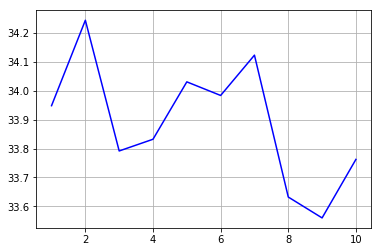

In [285]:
x_draw = range(1,11)
y_draw = []
for i in x_draw:
    train_X, test_X, train_Y, test_Y = train_test_split(all_select_column, all_regressor_result_column, test_size=0.2)
    clr.fit(train_X, train_Y)
    regressor_result = clr.predict(test_X)
    clr.score(test_X, test_Y)
    x = [p[0] for p in regressor_result.tolist()]
    y = [p[1] for p in regressor_result.tolist()]
    test_Y.insert(2, "Pre_lon", x)
    test_Y.insert(3, "Pre_lat", y)
    res = test_Y.apply(haversine, axis=1)
    y_draw.append(res.mean())
plt.plot(x_draw, y_draw, 'b')
plt.grid()
plt.savefig("result.png")

画图要求不明

数据要混合 因为结果不混合

In [286]:
clf = RandomForestClassifier(max_features = int(sqrt(features)))
scores = cross_val_score(clf, all_select_column, all_result_column)
scores.mean()

0.31478532555698752

In [287]:
train_X, test_X, train_Y, test_Y = train_test_split(all_select_column, all_result_column, test_size=0.2)

In [288]:
clf.fit(train_X, train_Y)
clf.score(test_X, test_Y)

0.66891015745600491

In [289]:
# start = 10
# end = 10
# rang = 10
# x = range(start,end, rang)
# y = []
# for num in x:
#     clf = RandomForestClassifier(n_estimators=num)
#     scores = cross_val_score(clf, train_select_column, train_result_column)
#     y.append(scores.mean())
# plt.plot(x, y, 'b')
# plt.grid()

In [290]:
clf = clf.fit(train_select_column, train_result_column)

In [291]:
scores.mean()

0.31478532555698752